<a href="https://colab.research.google.com/github/SaraaMaher/Multiclassification-MRI/blob/main/2nd_multiclass_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tflearn

     |████████████████████████████████| 107 kB 5.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=78d9ab95fe72e231620a136242e95fef70c66d53d8ed4fa9984c131ce86206ae
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import cv2
import numpy as np
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import datasets, layers, models
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Dense, BatchNormalization
from skimage.io import imread_collection
from sklearn.metrics import confusion_matrix
import itertools


from tensorflow.keras import optimizers
optimizers.RMSprop
optimizers.Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!unzip /content/drive/MyDrive/Training.zip

In [ ]:
from tensorflow import keras

In [ ]:
path = "/content/content/content/8020"
IMG_SIZE=227
MODEL_NAME="Multiclass_BrainTumor"

In [ ]:
def load_images_from_folder(path,l,Data,label):
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_LINEAR)
        img = img.reshape(img.shape+(1,)) 
        img = img.astype(np.uint8)
        if img is not None:
            Data.append(img)
            l = l.astype(np.uint8)
            label.append(l)
    

In [ ]:
def load_data(path2):
  fullpath=path+path2
  Data=[]
  label=[]
  load_images_from_folder(fullpath+"/glioma_tumor",np.array([0]),Data,label)
  load_images_from_folder(fullpath+"/meningioma_tumor",np.array([1]),Data,label)
  load_images_from_folder(fullpath+"/pituitary_tumor",np.array([2]),Data,label)
  Data=np.array(Data)
  label=np.array(label)
  return Data,label

In [ ]:
Train_Data,Train_Label=load_data("/Training")
Train_Label = keras.utils.to_categorical(Train_Label, 3)

In [ ]:
Test_Data,Test_Label=load_data("/Testing")


In [ ]:
Val_Data,Val_Label=load_data("/Validation")

In [ ]:
Test_Label = keras.utils.to_categorical(Test_Label, 3)

Val_Label = keras.utils.to_categorical(Val_Label, 3)

In [ ]:
print (Train_Label[0])

type(Train_Label[0])

[1. 0. 0.]


numpy.ndarray

In [ ]:
print (Train_Data[0].dtype)


uint8


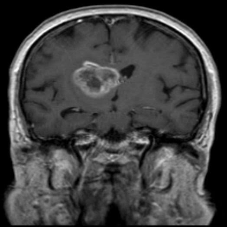

In [ ]:
cv2_imshow(Test_Data[0])

In [ ]:
print(np.array(Test_Data[0]).shape)

(227, 227, 1)


In [ ]:
from tensorflow.keras import regularizers
import keras.backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(128,(6,6), activation='relu', strides=(4,4) ,  padding='same', input_shape=(227,227,1),bias_regularizer=regularizers.L2(0.001)))
layers.BatchNormalization()


model.add(layers.MaxPooling2D(pool_size=(2, 2) , strides =(2,2),padding='same'))

model.add(layers.Conv2D(96, (6,6), activation='relu', strides =(1,1), padding='same',bias_regularizer=regularizers.L2(0.001))) 
model.add(layers.MaxPooling2D(pool_size = (2, 2) , strides =(2,2),padding='same'))

model.add(layers.Conv2D(96, (2,2), activation='relu', strides =(1,1), padding='same',bias_regularizer=regularizers.L2(0.001))) 
model.add(layers.MaxPooling2D(pool_size = (2, 2) , strides =(2,2),padding='same'))


model.add(layers.Conv2D(24, (6,6), activation='relu' , strides =(1,1), padding='same',bias_regularizer=regularizers.L2(0.001)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)  , strides =(2,2),padding='same'))

model.add(layers.Conv2D(24, (6,6), activation='relu', strides =(1,1), padding='same',bias_regularizer=regularizers.L2(0.001)))
model.add(layers.MaxPooling2D(pool_size = (2, 2) , strides =(2,2),padding='same'))

model.add(layers.Conv2D(32, (4,4), activation='relu' , strides=(1,1), padding='same',bias_regularizer=regularizers.L2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2) , strides=(2,2),padding='same'))



model.add(layers.Flatten())
model.add(layers.Dense(512))


model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense( 3, activation = "softmax"))  

opt = keras.optimizers.Adam(learning_rate=0.001)


model.compile(optimizer=opt ,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )


history = model.fit(Train_Data,Train_Label,epochs=30,batch_size=64, validation_data=(Val_Data, Val_Label))



/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Train on 18466 samples, validate on 861 samples
Epoch 1/30
18466/18466 [==============================] - ETA: 0s - loss: 0.8138 - acc: 0.6220

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


18466/18466 [==============================] - 27s 1ms/sample - loss: 0.8138 - acc: 0.6220 - val_loss: 0.6172 - val_acc: 0.7259
Epoch 2/30
18466/18466 [==============================] - 27s 1ms/sample - loss: 0.5669 - acc: 0.7530 - val_loss: 0.3959 - val_acc: 0.8351
Epoch 3/30
18466/18466 [==============================] - 26s 1ms/sample - loss: 0.4424 - acc: 0.8134 - val_loss: 0.2642 - val_acc: 0.8873
Epoch 4/30
18466/18466 [==============================] - 27s 1ms/sample - loss: 0.3646 - acc: 0.8492 - val_loss: 0.3747 - val_acc: 0.8200
Epoch 5/30
18466/18466 [==============================] - 27s 1ms/sample - loss: 0.2915 - acc: 0.8804 - val_loss: 0.2182 - val_acc: 0.9175
Epoch 6/30
18466/18466 [==============================] - 27s 1ms/sample - loss: 0.2393 - acc: 0.9038 - val_loss: 0.1925 - val_acc: 0.9338
Epoch 7/30
18466/18466 [==============================] - 26s 1ms/sample - loss: 0.2013 - acc: 0.9194 - val_loss: 0.2047 - val_acc: 0.9268
Epoch 8/30
18466/18466 [==============

0.947026


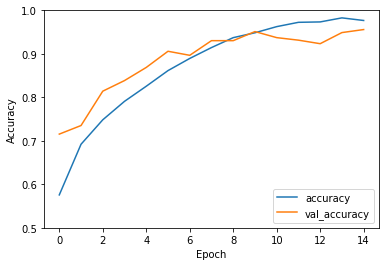

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Test_Data,Test_Label, verbose=2)
print(test_acc)

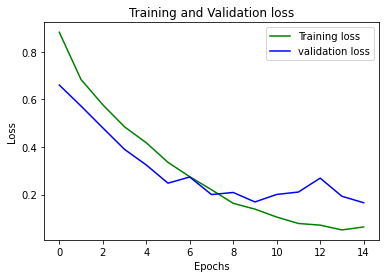

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("ymulti95.tfl")

In [ ]:
y_pred=model.predict(Test_Data)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
l=os.listdir('/content/content/8020/Training/pituitary_tumor')
print(len(l))

1172


In [ ]:
print(y_pred.shape)

(524, 3)
